In [1]:
import json
import numpy as np 
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read in data, configure dataframe
target_directory = '../data/full_opt_15KeV'

x_dictlist, y_dictlist = [], []

for json_file in os.listdir(target_directory):
    if json_file[-4:] != 'json':
        continue

    with open(f'{target_directory}/{json_file}') as f:
        samples = json.load(f)['samples']
        dvars = [samples[i]['dvar'] for i in samples.keys()]
        objs = [samples[i]['obj'] for i in samples.keys()]
        
        x_dictlist += dvars
        y_dictlist += objs
        
x_df = pd.DataFrame(x_dictlist).apply(pd.to_numeric)
y_df = pd.DataFrame(y_dictlist).apply(pd.to_numeric)

In [3]:
features_dict = {
    "DVAR1": "Bmax",
    "DVAR2": "mX1",
    "DVAR3": "mX2",
    "DVAR4": "mY1",
    "DVAR5": "mY2",
    "DVAR6": "mtau1",
    "DVAR7": "mtau2",
    "DVAR8": "PhiY1",
    "DVAR9": "PhiY2",
    "DVAR10": "Phitau1",
    "DVAR11": "Phitau2",
    "DVAR12": "mY3ref",
    "DVAR13": "PhiY3ref",
    "DVAR14": "Eref",
}

response_dict = {
    "OBJ1": "transmission",
    "OBJ2": "output energy",
    "OBJ3": "RFQ length",
    "OBJ4": "longitudinal emittance",
    "OBJ5": "x-emittance",
    "OBJ6": "y-emittance",
}

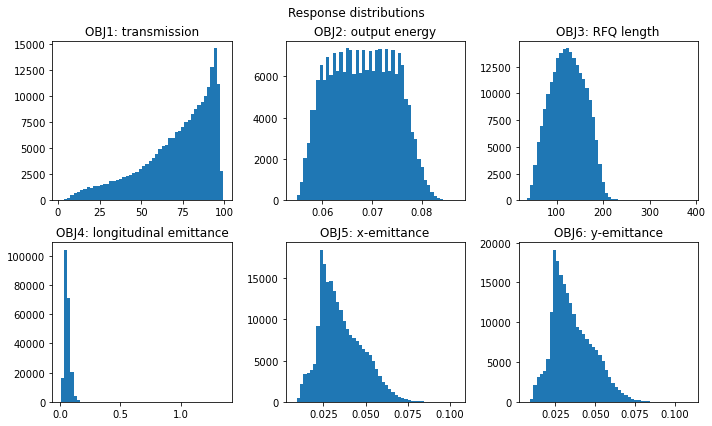

In [4]:
# y
fig, axs = plt.subplots(2, 3, figsize=(10,6))

for i in range(y_df.shape[1]):
    ax = axs.flatten()[i]
    ax.hist(y_df.values[:, i], bins=50)
    ax.set_title(f'OBJ{i+1}: ' + response_dict[f'OBJ{i+1}'])
    
plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Response distributions')
plt.show()

## Joint distributions of transverse emittance parametrization schemes
- $\textrm{OBJ5'} \equiv \textrm{OBJ5} + \textrm{OBJ6}$, $\textrm{OBJ6'} \equiv \textrm{OBJ5} - \textrm{OBJ6}$
- $\textrm{OBJ5'} \equiv \sqrt{\textrm{OBJ5}^2 + \textrm{OBJ6}^2}$, $\textrm{OBJ6'} \equiv \arctan (\textrm{OBJ6} / \textrm{OBJ5})$
- $\textrm{OBJ5'} \equiv \max (\textrm{OBJ5}, \textrm{OBJ6})$, $\textrm{OBJ6'} \equiv \min (\textrm{OBJ5}, \textrm{OBJ6})$

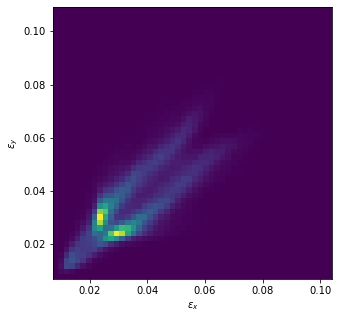

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist2d(y_df['OBJ5'], y_df['OBJ6'], bins=50)
ax.set_xlabel('$\epsilon_x$')
ax.set_ylabel('$\epsilon_y$')
plt.show()

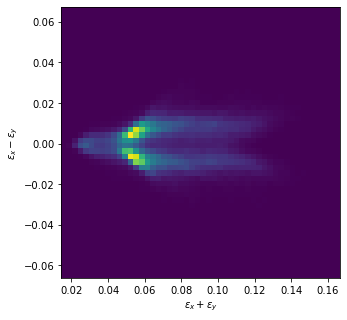

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist2d(y_df['OBJ5'] + y_df['OBJ6'], y_df['OBJ5'] - y_df['OBJ6'], bins=50)
ax.set_xlabel('$\epsilon_x + \epsilon_y$')
ax.set_ylabel('$\epsilon_x - \epsilon_y$')
plt.show()

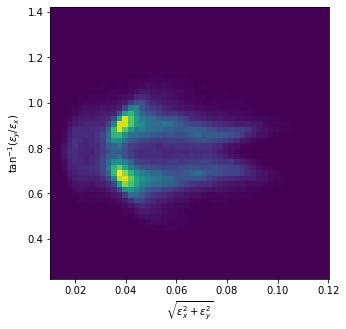

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist2d(
    np.sqrt(y_df['OBJ5'].values**2 + y_df['OBJ6'].values**2),
    np.arctan(y_df['OBJ6'].values/y_df['OBJ5'].values), bins=50
)
ax.set_xlabel('$\sqrt{\epsilon_x^2 + \epsilon_y^2}$')
ax.set_ylabel('$\\tan^{-1} (\epsilon_y / \epsilon_x)$')
plt.show()

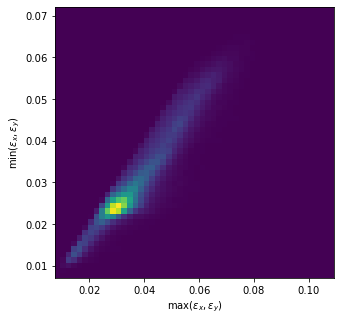

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hist2d(
    np.maximum(y_df['OBJ5'].values, y_df['OBJ6'].values),
    np.minimum(y_df['OBJ5'].values, y_df['OBJ6'].values), bins=50)
ax.set_xlabel('$\max (\epsilon_x, \epsilon_y)$')
ax.set_ylabel('$\min (\epsilon_x, \epsilon_y)$')
plt.show()